# UBER Supply-Demand Gap Assignment

In [56]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# the commonly used alias for seaborn is sns
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the Uber Request database. Store it in a variable called `df_uber`.

In [59]:
# data
df_uber = pd.read_csv("E:/Self Studies/PGDDS/Case Study- Uber/Uber Request Data.csv")
df_uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [60]:
## Looking at the datatypes of each column
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [61]:
# Describe: summary of all the numeric columns in the dataset
df_uber.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [62]:
# This command will give you all the list of columns in dataframes
df_uber.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [63]:
df_uber.shape
#shape command will give you the rows and column info

(6745, 6)

In [64]:
# You can extract the values of a dataframe as a numpy array using df.values 
df_uber.values

array([[619, 'Airport', 1.0, 'Trip Completed', '11/7/2016 11:51',
        '11/7/2016 13:00'],
       [867, 'Airport', 1.0, 'Trip Completed', '11/7/2016 17:57',
        '11/7/2016 18:47'],
       [1807, 'City', 1.0, 'Trip Completed', '12/7/2016 9:17',
        '12/7/2016 9:58'],
       ...,
       [6751, 'City', nan, 'No Cars Available', '15-07-2016 23:52:06',
        nan],
       [6754, 'City', nan, 'No Cars Available', '15-07-2016 23:54:39',
        nan],
       [6753, 'Airport', nan, 'No Cars Available', '15-07-2016 23:55:03',
        nan]], dtype=object)

## Task 2: Cleaning the Data

Inspect Null/Missing values,Drop uneccesary rows/columns

In [65]:
# Write your code for column-wise null count here
#isnull function gives you count of null values, we can either use sum() or sum(axis=0) for column-wise count

UBERNullCount=df_uber.isnull().sum(axis=0)
UBERNullCount

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

## Task 3: Data Analysis

-  ### Subtask 3.1: Change the unit of columns

In [66]:
#Changing datatype of Request timestamp column and its fromatting
df_uber['Request timestamp'] = df_uber['Request timestamp'].astype(str)
df_uber['Request timestamp'] = df_uber['Request timestamp'].str.replace("/","-")

In [67]:
#Changing datatype to date format
df_uber['Request timestamp'] = pd.to_datetime(df_uber['Request timestamp'], dayfirst=True)

In [68]:
#Changing datatype of Drop timestamp column and its fromatting
df_uber['Drop timestamp'] = df_uber['Drop timestamp'].astype(str)
df_uber['Drop timestamp'] = df_uber['Drop timestamp'].str.replace("/","-")

In [69]:
#Changing datatype to date format
df_uber['Drop timestamp'] = pd.to_datetime(df_uber['Drop timestamp'], dayfirst=True)

In [70]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [71]:
df_uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [72]:
#extract hours from request timestamp into new variables
df_uber['Request_Hour']= df_uber['Request timestamp'].dt.hour

#df_uber['Request_Hour']=df_uber['Request timestamp'].timestamp.apply(lambda x: x.hour)

In [73]:
#extract day from request timestamp into new variables
df_uber['Request_Day']= df_uber['Request timestamp'].dt.day

In [74]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
Request_Hour         6745 non-null int64
Request_Day          6745 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 421.6+ KB


# Task 4: Visual Representation of Data

-  ### Subtask 4.1: Visualise the frequency of requests of Hours and Day w.r.t. Status

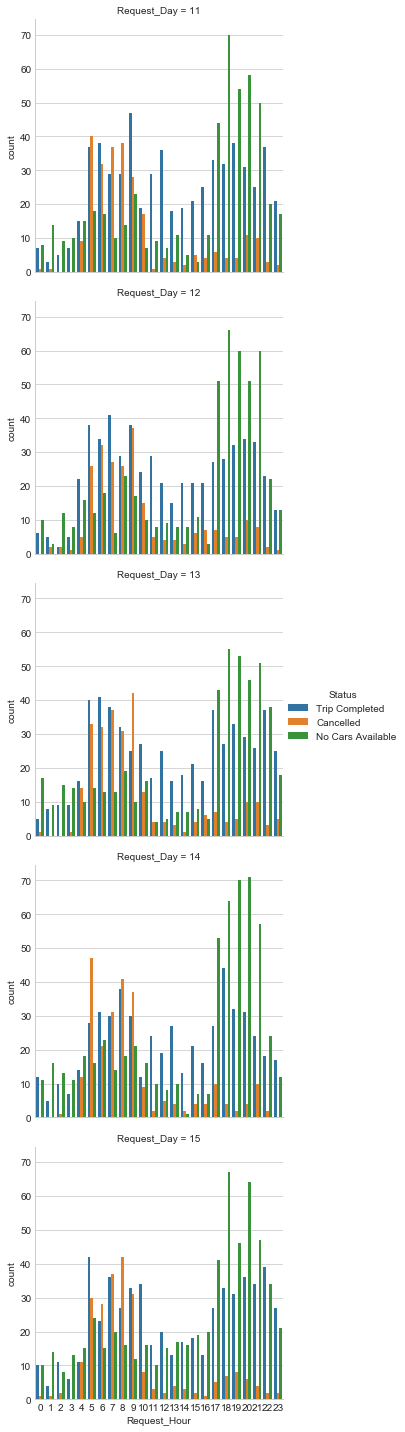

In [75]:
# factor plot of hour and day w.r.t. status
sns.factorplot(x = "Request_Hour", hue = "Status", row = "Request_Day", data = df_uber, kind = "count")

-  ### Subtask 4.2: Most problematic types of requests (city to airport / airport to city etc.)

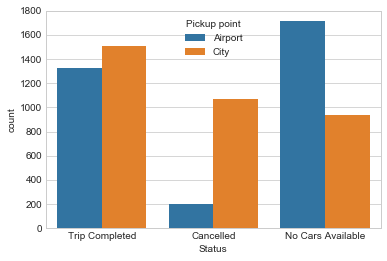

In [76]:
# Count plot wrt Status and Pickup point
sns.countplot(x="Status",hue = "Pickup point", data=df_uber)
plt.show()

-  ### Subtask 4.3:  The time slots (early mornings, late evenings etc.) Visualization

In [88]:
# creating a time slots for various time period of day
def time_period(Hrs):
    'divide the time of the day into four categories'
    if  2 <= Hrs < 5:
        return "Early_Morning"
    elif 5 <= Hrs < 11:
        return "Morn_PickHrs"
    elif 11 <= Hrs < 17:
        return "Non_PickHrs"
    elif 17 <= Hrs < 23:
        return "Even_PickHrs"
    else:
        return "Late_Night"

df_uber['time_slots'] = df_uber.Request_Hour.apply(lambda Hrs: time_period(Hrs))

In [89]:
df_uber.time_slots.value_counts()

Even_PickHrs     2646
Morn_PickHrs     2346
Non_PickHrs       981
Early_Morning     394
Late_Night        378
Name: time_slots, dtype: int64

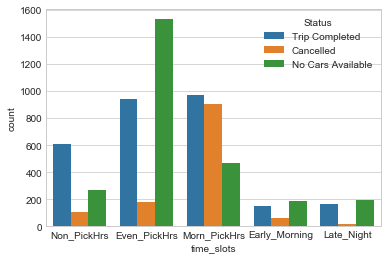

In [90]:
# Time slot w.r.t. status and identify the most critical problematic part
sns.countplot(x = "time_slots", hue = "Status", data = df_uber, orient="H" )

# Task 5: Gap Analysis between Demand and Supply

-  ### Subtask 5.1: Analysis on the time slots where the highest gap exists

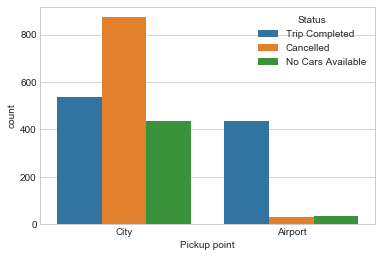

In [102]:
# as you can see in the above plot the highest number of cancellations are in the "Morn_PickHrs" time slot
df_Morning_Picktime = df_uber[df_uber.time_slots == "Morn_PickHrs"]
sns.countplot(x = "Pickup point", hue = "Status", data = df_Morning_Picktime)

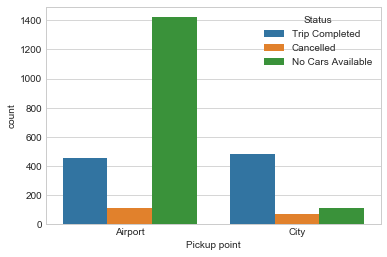

In [92]:
# let's look at the supply and demand in evening picktime
df_Evening_Picktime = df_uber[df_uber.time_slots == "Even_PickHrs"]
sns.countplot(x = "Pickup point", hue = "Status", data = df_Evening_Picktime)

In [109]:
# Pie charts/plots
def pie_chart(df_uber):

    labels = df_uber.index.values
    sizes = df_uber['Status'].values
        
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.show()

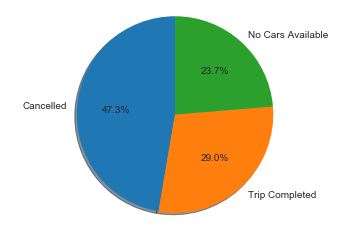

In [111]:
# Pie Chart on Evening Picktimes where pickup point is City
CityAnalysis = df_uber.loc[(df_uber["Pickup point"] == "City") & (df_uber.time_slots == "Morn_PickHrs")]
CityAnalysis_Count = pd.DataFrame(CityAnalysis.Status.value_counts())
pie_chart(CityAnalysis_Count)

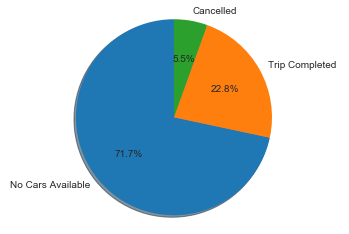

In [110]:
# Pie Chart on Evening Picktimes where pickup point is Airport
AirportAnalysis = df_uber.loc[(df_uber["Pickup point"] == "Airport") & (df_uber.time_slots == "Even_PickHrs")] 
AirportAnalysis_Count = pd.DataFrame(AirportAnalysis.Status.value_counts())
pie_chart(AirportAnalysis_Count)

-  ### Subtask 5.2: Analysis on types of requests (city-airport or airport-city) for which the time slots where the highest gap exists

# Morning Demand Supply Analysis [Highest Gap Overview]

- #### Morning Picktime Analysis from City & From Airport [Total Trip]

In [112]:
City_Morning_Total_Trips  = df_Morning_Picktime.loc[(df_Morning_Picktime["Pickup point"] == "City")]
len(City_Morning_Total_Trips.index)

1845

In [113]:
Airport_Morning_Total_Trips  = df_Morning_Picktime.loc[(df_Morning_Picktime["Pickup point"] == "Airport")]
len(Airport_Morning_Total_Trips.index)

501

- #### Morning Picktime Analysis from City & From Airport [Cancelled Cabs]

In [114]:
# severity of problem by location and their count (Cancelled Cabs from City)
City_Cancelled_Trip = df_Morning_Picktime.loc[(df_Morning_Picktime["Pickup point"] == "City") & (df_Morning_Picktime["Status"] == "Cancelled")]
len(City_Cancelled_Trip.index)

873

In [115]:
# severity of problem by location and their count (Cancelled Cabs from Airport)
Airport_Cancelled_Trip  = df_Morning_Picktime.loc[(df_Morning_Picktime["Pickup point"] == "Airport") & (df_Morning_Picktime["Status"] == "Cancelled")]
len(Airport_Cancelled_Trip.index)

32

## Evening Demand Supply Analysis [Highest Gap Overview]

- #### Evening Picktime Analysis from City & From Airport [Total trips]

In [107]:
City_Even_Total_Trips  = df_Evening_Picktime.loc[(df_Evening_Picktime["Pickup point"] == "City")]
len(City_Even_Total_Trips.index)

663

In [108]:
Airport_Even_Total_Trips  = df_Evening_Picktime.loc[(df_Evening_Picktime["Pickup point"] == "Airport")]
len(Airport_Even_Total_Trips.index)

1983

- #### Evening Picktime Analysis from City & From Airport [No Cars available]

In [116]:
# severity of problem by location and their count (No Cars Available from City)
City_Unavailable_Trip  = df_Evening_Picktime.loc[(df_Evening_Picktime["Pickup point"] == "City") & (df_Evening_Picktime["Status"] == "No Cars Available")]
len(City_Unavailable_Trip.index)

109

In [100]:
# severity of problem by location and their count (No Cars Available from Airport)
Airport_Unavailable_Trip  = df_Evening_Picktime.loc[(df_Evening_Picktime["Pickup point"] == "Airport") & (df_Evening_Picktime["Status"] == "No Cars Available")]
len(Airport_Unavailable_Trip.index)

1421

## Morning Demand Supply Other Analysis 

- #### Completed Trips Overview

In [121]:
###City Completed Trips
City_Completed_Trip = df_Morning_Picktime.loc[(df_Morning_Picktime["Pickup point"] == "City") & (df_Morning_Picktime["Status"] == "Trip Completed")]
len(City_Completed_Trip.index)

535

In [122]:
###Airtport Completed Trips
Airport_Completed_Trip = df_Morning_Picktime.loc[(df_Morning_Picktime["Pickup point"] == "Airport") & (df_Morning_Picktime["Status"] == "Trip Completed")]
len(Airport_Completed_Trip.index)

435

- #### Unavailability of Cars Overview

In [128]:
###City Completed Trips
City_Unavailable_Trip = df_Morning_Picktime.loc[(df_Morning_Picktime["Pickup point"] == "City") & (df_Morning_Picktime["Status"] == "No Cars Available")]
len(City_Completed_Trip.index)

485

In [129]:
###Airtport Completed Trips
Airport_Unavailable_Trip = df_Morning_Picktime.loc[(df_Morning_Picktime["Pickup point"] == "Airport") & (df_Morning_Picktime["Status"] == "No Cars Available")]
len(Airport_Completed_Trip.index)

453

## Evening Demand Supply Other Analysis 

- #### Completed Trips Overview

In [123]:
###City Completed Trips
City_Completed_Trip = df_Evening_Picktime.loc[(df_Evening_Picktime["Pickup point"] == "City") & (df_Evening_Picktime["Status"] == "Trip Completed")]
len(City_Completed_Trip.index)

485

In [125]:
###Airport Completed Trips
Airport_Completed_Trip = df_Evening_Picktime.loc[(df_Evening_Picktime["Pickup point"] == "Airport") & (df_Evening_Picktime["Status"] == "Trip Completed")]
len(Airport_Completed_Trip.index)

453

- #### Cancelled Cabs Overview

In [126]:
###City Cancelled Trips
City_Cancelled_Trip = df_Evening_Picktime.loc[(df_Evening_Picktime["Pickup point"] == "City") & (df_Evening_Picktime["Status"] == "Cancelled")]
len(City_Cancelled_Trip.index)

69

In [127]:
###Airport Cancelled Trips
Airport_Cancelled_Trip = df_Evening_Picktime.loc[(df_Evening_Picktime["Pickup point"] == "Airport") & (df_Evening_Picktime["Status"] == "Cancelled")]
len(Airport_Cancelled_Trip.index)

109